In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re 
import pandas
from collections import defaultdict
#from smile_generator import *
from rdkit import Chem
from copy import deepcopy
from kidanemariam_ezr import *

## Task 1

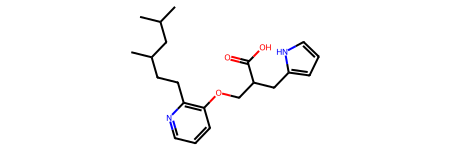

In [3]:
mol_object=Molecule.from_smiles("CC(CC(C)C)CCc1ncccc1OCC(C(O)=O)Cc1[nH]ccc1")
mol_object

In [13]:
#trial=Molecule.from_smiles('N=C1C=CC(C=C1)=C(c2ccc(N)c(C)c2)c3ccc(N)cc3')
#trial1=Molecule.from_smiles('c1ccc2ccccc2c1')
#sm_trial=Molecule.to_smiles(trial)
#sm_trial
#trial1
#sm_trial1=Molecule.to_smiles(trial1)
#sm_trial1
def sample_smile_to_rdkit_smile(smiles):
    
    trial=Molecule.from_smiles(smiles)
    rdkt=Chem.MolToSmiles(trial.to_rdkit())
    return rdkt
def sketch_z_otcome(canonical):
    trial=Molecule.from_smiles(canonical)
    return trial

In [14]:
sample_smile_to_rdkit_smile('Oc1cc(C(O)CNC)ccc1O')

'CNCC(O)c1ccc(O)c(O)c1'

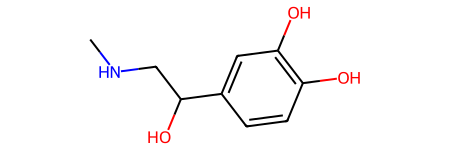

In [15]:
sketch_z_otcome(_)

In [5]:
classified_m=Molecule.classify_BM_atom(mol_object)
classified_m

{<CH1>: 'side chain',
 <CH1>: 'ring',
 <CH1>: 'side chain',
 <C>: 'ring',
 <N>: 'ring',
 <CH1>: 'ring',
 <CH3>: 'side chain',
 <CH2>: 'side chain',
 <CH1>: 'ring',
 <CH2>: 'side chain',
 <C>: 'ring',
 <O>: 'linkers',
 <CH2>: 'linkers',
 <CH3>: 'side chain',
 <CH1>: 'linkers',
 <C>: 'side chain',
 <OH1>: 'side chain',
 <O>: 'side chain',
 <CH2>: 'linkers',
 <C>: 'ring',
 <NH1>: 'ring',
 <CH1>: 'ring',
 <CH1>: 'ring',
 <CH1>: 'ring',
 <CH3>: 'side chain',
 <CH2>: 'side chain'}

## Task 2

This code loads a molecule from a file, classifies the atoms in the molecule using the classify_BM_atoms function, and then uses the RDKit visualization capabilities to highlight the atoms according to their Bemis-Murcko type. A dictionary is used to map each atom type to a specific color, and the SetProp method is used to set a color property for each atom. Finally, the molecule is drawn to a file with the highlighted atoms.

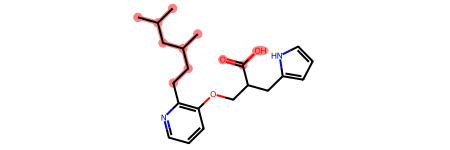

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw

# Load molecule from file
#mol = Chem.MolFromMolFile('molecule.mol')
mol_object.to_rdkit()
# Classify atoms in the molecule
classification = Molecule.classify_BM_atom(mol_object)
mol,mapping=mol_object.to_rdkit_with_map()
#--------------------
rdkit_ring_atoms=[mapping[ra] for ra in mol_object.get_atoms() if mol_object._classification[ra]=="side chain"]

rdkit_ring_atoms
mol.__sssAtoms=rdkit_ring_atoms
mol

## Task 3

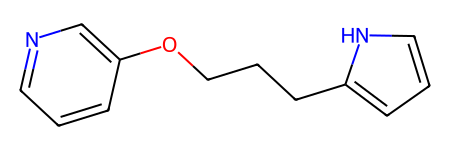

In [7]:
BM_scaffold=Molecule.get_BM_scaffolds(mol_object)
BM_scaffold

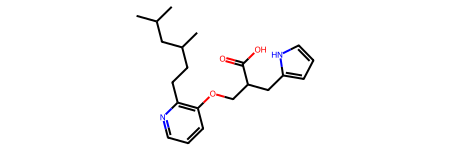

In [8]:
mol_object

## Task 4

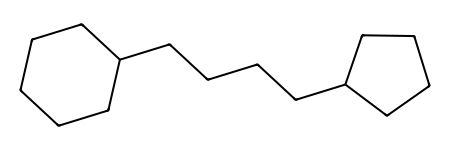

In [9]:
cyclic_skeleton=Molecule.get_cyclic_skeletons(mol_object)
cyclic_skeleton

## Task 5

This function makes a copy of the cyclic skeleton and iterates over the atoms and bonds in the skeleton, setting the atom degrees to 2 and the bond orders to 1. It then sets the formal charges to 0 and updates the hydrogen counts to ensure that the formal charges remain unchanged. This results in a reduced ring scaffold where all atoms have degree 2 and all bonds have bond order 1, and the lengths of the linkers and the sizes of the rings are minimized

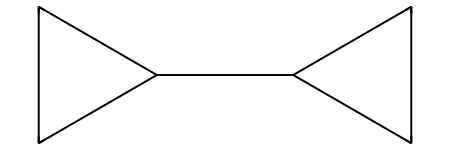

In [10]:
reduced_ring_scaffold=Molecule.get_reduced_ring_scaffolds(mol_object)
reduced_ring_scaffold

In [11]:
Molecule.to_smiles(reduced_ring_scaffold)

'C1CC1C1CC1'

## Task 6

### Apply your methods to the molecules in the files 5ht1a.smi, d4.smi, and net.smi. For each of the files, determine the number of different molecules, Bemis-Murcko scaffolds, cyclic skeletons, and reduced ring scaffolds

In [12]:
def file_df(smi):
    with open(smi, "r") as file:
        data = file.readlines()


    smiles = []

    # Iterate through each line and append the first to the list
    for smile in data:
        smiles_ = smile.split(" ")[0]
        smiles.append(smiles_)

    # Create a dataframe from the list of first lines, with index column
    df = pd.DataFrame(smiles, columns=["smiles"], index=range(1, len(smiles)+1))
    return df

    





In [13]:
d4_smiles=file_df('d4.smi')
h5t1a_smiles=file_df('5ht1a.smi')
net_smiles=file_df('net.smi')

In [14]:
d4_smiles

smiles
1      CN1CCN2c3c1cccc3C4C2CCN(C4)CCCC(=O)c5ccc(cc5)F
2                          CCN(CC)C(=S)SSC(=S)N(CC)CC
3                       c1ccc(cc1)OCCCNCCOc2ccc(cc2)O
4                              c1cc2c(cc1Cl)CNC(=N2)N
5            c1ccc(cc1)C(c2ccccc2)(c3ccccc3Cl)n4ccnc4
..                                                ...
79  c1ccc(cc1)N2CNC(=O)C23CCN(CC3)CCCC(=O)c4ccc(cc4)F
80         c1cc(ccc1N2CCN(CC2)CCNCC3CCc4ccc(cc4O3)O)I
81                      Cc1ccc(cc1Cl)OCCNCCCOc2ccccc2
82            Cc1ccc(cc1C)C(=NOC)CCN2CCN(CC2)c3ccccn3
83  COc1ccccc1N2CCN(CC2)CCCCn3cc(nn3)c4ccc(cc4)c5c...

[83 rows x 1 columns]

In [15]:
def process_dataframe(df, column, function,desired_col):
    # Apply the function to the specified column
    result = df[column].apply(function)
    # Create a new column in the dataframe with the result
    df[desired_col] = result
    return df

## 6.1

In [16]:
with_unique_structure=process_dataframe(d4_smiles,'smiles',Molecule.from_smiles,'M-structure')
#with_unique_structure

## 6.2

In [17]:
with_BM_scaffold=process_dataframe(with_unique_structure,'M-structure',Molecule.get_BM_scaffolds,'BM-scaffold')
#with_BM_scaffold

## 6.3

In [18]:
with_cyclic_skeleton=process_dataframe(with_BM_scaffold,'BM-scaffold',Molecule.get_cyclic_skeletons,'cyclic_skeleton')
#with_cyclic_skeleton

## 6.4

In [19]:
with_reduced_ring_scaffold=process_dataframe(with_cyclic_skeleton,'cyclic_skeleton',Molecule.get_reduced_ring_scaffolds,'reduced_ring_scaffold')
with_reduced_ring_scaffold

smiles  \
1      CN1CCN2c3c1cccc3C4C2CCN(C4)CCCC(=O)c5ccc(cc5)F   
2                          CCN(CC)C(=S)SSC(=S)N(CC)CC   
3                       c1ccc(cc1)OCCCNCCOc2ccc(cc2)O   
4                              c1cc2c(cc1Cl)CNC(=N2)N   
5            c1ccc(cc1)C(c2ccccc2)(c3ccccc3Cl)n4ccnc4   
..                                                ...   
79  c1ccc(cc1)N2CNC(=O)C23CCN(CC3)CCCC(=O)c4ccc(cc4)F   
80         c1cc(ccc1N2CCN(CC2)CCNCC3CCc4ccc(cc4O3)O)I   
81                      Cc1ccc(cc1Cl)OCCNCCCOc2ccccc2   
82            Cc1ccc(cc1C)C(=NOC)CCN2CCN(CC2)c3ccccn3   
83  COc1ccccc1N2CCN(CC2)CCCCn3cc(nn3)c4ccc(cc4)c5c...   

                                          M-structure  \
1   <kidanemariam_ezr.Molecule object at 0x0000016...   
2   <kidanemariam_ezr.Molecule object at 0x0000016...   
3   <kidanemariam_ezr.Molecule object at 0x0000016...   
4   <kidanemariam_ezr.Molecule object at 0x0000016...   
5   <kidanemariam_ezr.Molecule object at 0x0000016...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x0000016...   
80  <kidanemariam_ezr.Molecule object at 0x0000016...   
81  <kidanemariam_ezr.Molecule object at 0x0000016...   
82  <kidanemariam_ezr.Molecule object at 0x0000016...   
83  <kidanemariam_ezr.Molecule object at 0x0000016...   

                                          BM-scaffold  \
1   <kidanemariam_ezr.Molecule object at 0x0000016...   
2   <kidanemariam_ezr.Molecule object at 0x0000016...   
3   <kidanemariam_ezr.Molecule object at 0x0000016...   
4   <kidanemariam_ezr.Molecule object at 0x0000016...   
5   <kidanemariam_ezr.Molecule object at 0x0000016...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x0000016...   
80  <kidanemariam_ezr.Molecule object at 0x0000016...   
81  <kidanemariam_ezr.Molecule object at 0x0000016...   
82  <kidanemariam_ezr.Molecule object at 0x0000016...   
83  <kidanemariam_ezr.Molecule object at 0x0000016...   

                                      cyclic_skeleton  \
1   <kidanemariam_ezr.Molecule object at 0x0000016...   
2   <kidanemariam_ezr.Molecule object at 0x0000016...   
3   <kidanemariam_ezr.Molecule object at 0x0000016...   
4   <kidanemariam_ezr.Molecule object at 0x0000016...   
5   <kidanemariam_ezr.Molecule object at 0x0000016...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x0000016...   
80  <kidanemariam_ezr.Molecule object at 0x0000016...   
81  <kidanemariam_ezr.Molecule object at 0x0000016...   
82  <kidanemariam_ezr.Molecule object at 0x0000016...   
83  <kidanemariam_ezr.Molecule object at 0x0000016...   

                                reduced_ring_scaffold  
1   <kidanemariam_ezr.Molecule object at 0x0000016...  
2   <kidanemariam_ezr.Molecule object at 0x0000016...  
3   <kidanemariam_ezr.Molecule object at 0x0000016...  
4   <kidanemariam_ezr.Molecule object at 0x0000016...  
5   <kidanemariam_ezr.Molecule object at 0x0000016...  
..                                                ...  
79  <kidanemariam_ezr.Molecule object at 0x0000016...  
80  <kidanemariam_ezr.Molecule object at 0x0000016...  
81  <kidanemariam_ezr.Molecule object at 0x0000016...  
82  <kidanemariam_ezr.Molecule object at 0x0000016...  
83  <kidanemariam_ezr.Molecule object at 0x0000016...  

[83 rows x 5 columns]

In [21]:
result =_

In [31]:
result['reduced_ring_scaffold-smiles']=result.reduced_ring_scaffold.apply(lambda x: x.to_smiles())

In [37]:
result['cyclic_skeleton-smiles'].describe()

count                                  83
unique                                 62
top       C1CCC(CCCC2CCC(C3CCCCC3)CC2)CC1
freq                                    6
Name: cyclic_skeleton-smiles, dtype: object

In [34]:
result

smiles  \
1      CN1CCN2c3c1cccc3C4C2CCN(C4)CCCC(=O)c5ccc(cc5)F   
2                          CCN(CC)C(=S)SSC(=S)N(CC)CC   
3                       c1ccc(cc1)OCCCNCCOc2ccc(cc2)O   
4                              c1cc2c(cc1Cl)CNC(=N2)N   
5            c1ccc(cc1)C(c2ccccc2)(c3ccccc3Cl)n4ccnc4   
..                                                ...   
79  c1ccc(cc1)N2CNC(=O)C23CCN(CC3)CCCC(=O)c4ccc(cc4)F   
80         c1cc(ccc1N2CCN(CC2)CCNCC3CCc4ccc(cc4O3)O)I   
81                      Cc1ccc(cc1Cl)OCCNCCCOc2ccccc2   
82            Cc1ccc(cc1C)C(=NOC)CCN2CCN(CC2)c3ccccn3   
83  COc1ccccc1N2CCN(CC2)CCCCn3cc(nn3)c4ccc(cc4)c5c...   

                                          M-structure  \
1   <kidanemariam_ezr.Molecule object at 0x0000016...   
2   <kidanemariam_ezr.Molecule object at 0x0000016...   
3   <kidanemariam_ezr.Molecule object at 0x0000016...   
4   <kidanemariam_ezr.Molecule object at 0x0000016...   
5   <kidanemariam_ezr.Molecule object at 0x0000016...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x0000016...   
80  <kidanemariam_ezr.Molecule object at 0x0000016...   
81  <kidanemariam_ezr.Molecule object at 0x0000016...   
82  <kidanemariam_ezr.Molecule object at 0x0000016...   
83  <kidanemariam_ezr.Molecule object at 0x0000016...   

                                          BM-scaffold  \
1   <kidanemariam_ezr.Molecule object at 0x0000016...   
2   <kidanemariam_ezr.Molecule object at 0x0000016...   
3   <kidanemariam_ezr.Molecule object at 0x0000016...   
4   <kidanemariam_ezr.Molecule object at 0x0000016...   
5   <kidanemariam_ezr.Molecule object at 0x0000016...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x0000016...   
80  <kidanemariam_ezr.Molecule object at 0x0000016...   
81  <kidanemariam_ezr.Molecule object at 0x0000016...   
82  <kidanemariam_ezr.Molecule object at 0x0000016...   
83  <kidanemariam_ezr.Molecule object at 0x0000016...   

                                      cyclic_skeleton  \
1   <kidanemariam_ezr.Molecule object at 0x0000016...   
2   <kidanemariam_ezr.Molecule object at 0x0000016...   
3   <kidanemariam_ezr.Molecule object at 0x0000016...   
4   <kidanemariam_ezr.Molecule object at 0x0000016...   
5   <kidanemariam_ezr.Molecule object at 0x0000016...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x0000016...   
80  <kidanemariam_ezr.Molecule object at 0x0000016...   
81  <kidanemariam_ezr.Molecule object at 0x0000016...   
82  <kidanemariam_ezr.Molecule object at 0x0000016...   
83  <kidanemariam_ezr.Molecule object at 0x0000016...   

                                reduced_ring_scaffold  \
1   <kidanemariam_ezr.Molecule object at 0x0000016...   
2   <kidanemariam_ezr.Molecule object at 0x0000016...   
3   <kidanemariam_ezr.Molecule object at 0x0000016...   
4   <kidanemariam_ezr.Molecule object at 0x0000016...   
5   <kidanemariam_ezr.Molecule object at 0x0000016...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x0000016...   
80  <kidanemariam_ezr.Molecule object at 0x0000016...   
81  <kidanemariam_ezr.Molecule object at 0x0000016...   
82  <kidanemariam_ezr.Molecule object at 0x0000016...   
83  <kidanemariam_ezr.Molecule object at 0x0000016...   

                                   BM-scaffold-smiles  \
1            c1ccc(CCCCN2CCC3C(C2)c2cccc4c2N3CCN4)cc1   
2                                                   S   
3                          c1ccc(OCCCNCCOc2ccccc2)cc1   
4                                     C1=Nc2ccccc2CN1   
5              c1ccc(C(c2ccccc2)(c2ccccc2)n2ccnc2)cc1   
..                                                ...   
79             c1ccc(CCCCN2CCC3(CC2)CNCN3c2ccccc2)cc1   
80             c1ccc(N2CCN(CCNCC3CCc4ccccc4O3)CC2)cc1   
81                         c1ccc(OCCCNCCOc2ccccc2)cc1   
82                    c1ccc(CCCN2CCN(c3ccccn3)CC2)cc